<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter8/Mock2/mock_test2_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 탐색

## (1) 시각화 포함 탐색적 자료분석을 시행하시오(EDA)

In [155]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/refs/heads/main/data/diabetes_for_test.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


먼저 데이터를 살펴본 결과, 모두 수치형 데이터임을 알 수 있고, 결측치가 단 하나도 없음을 알 수 있다.  
먼저 산점도행렬과 상관관계행렬을 그려보자

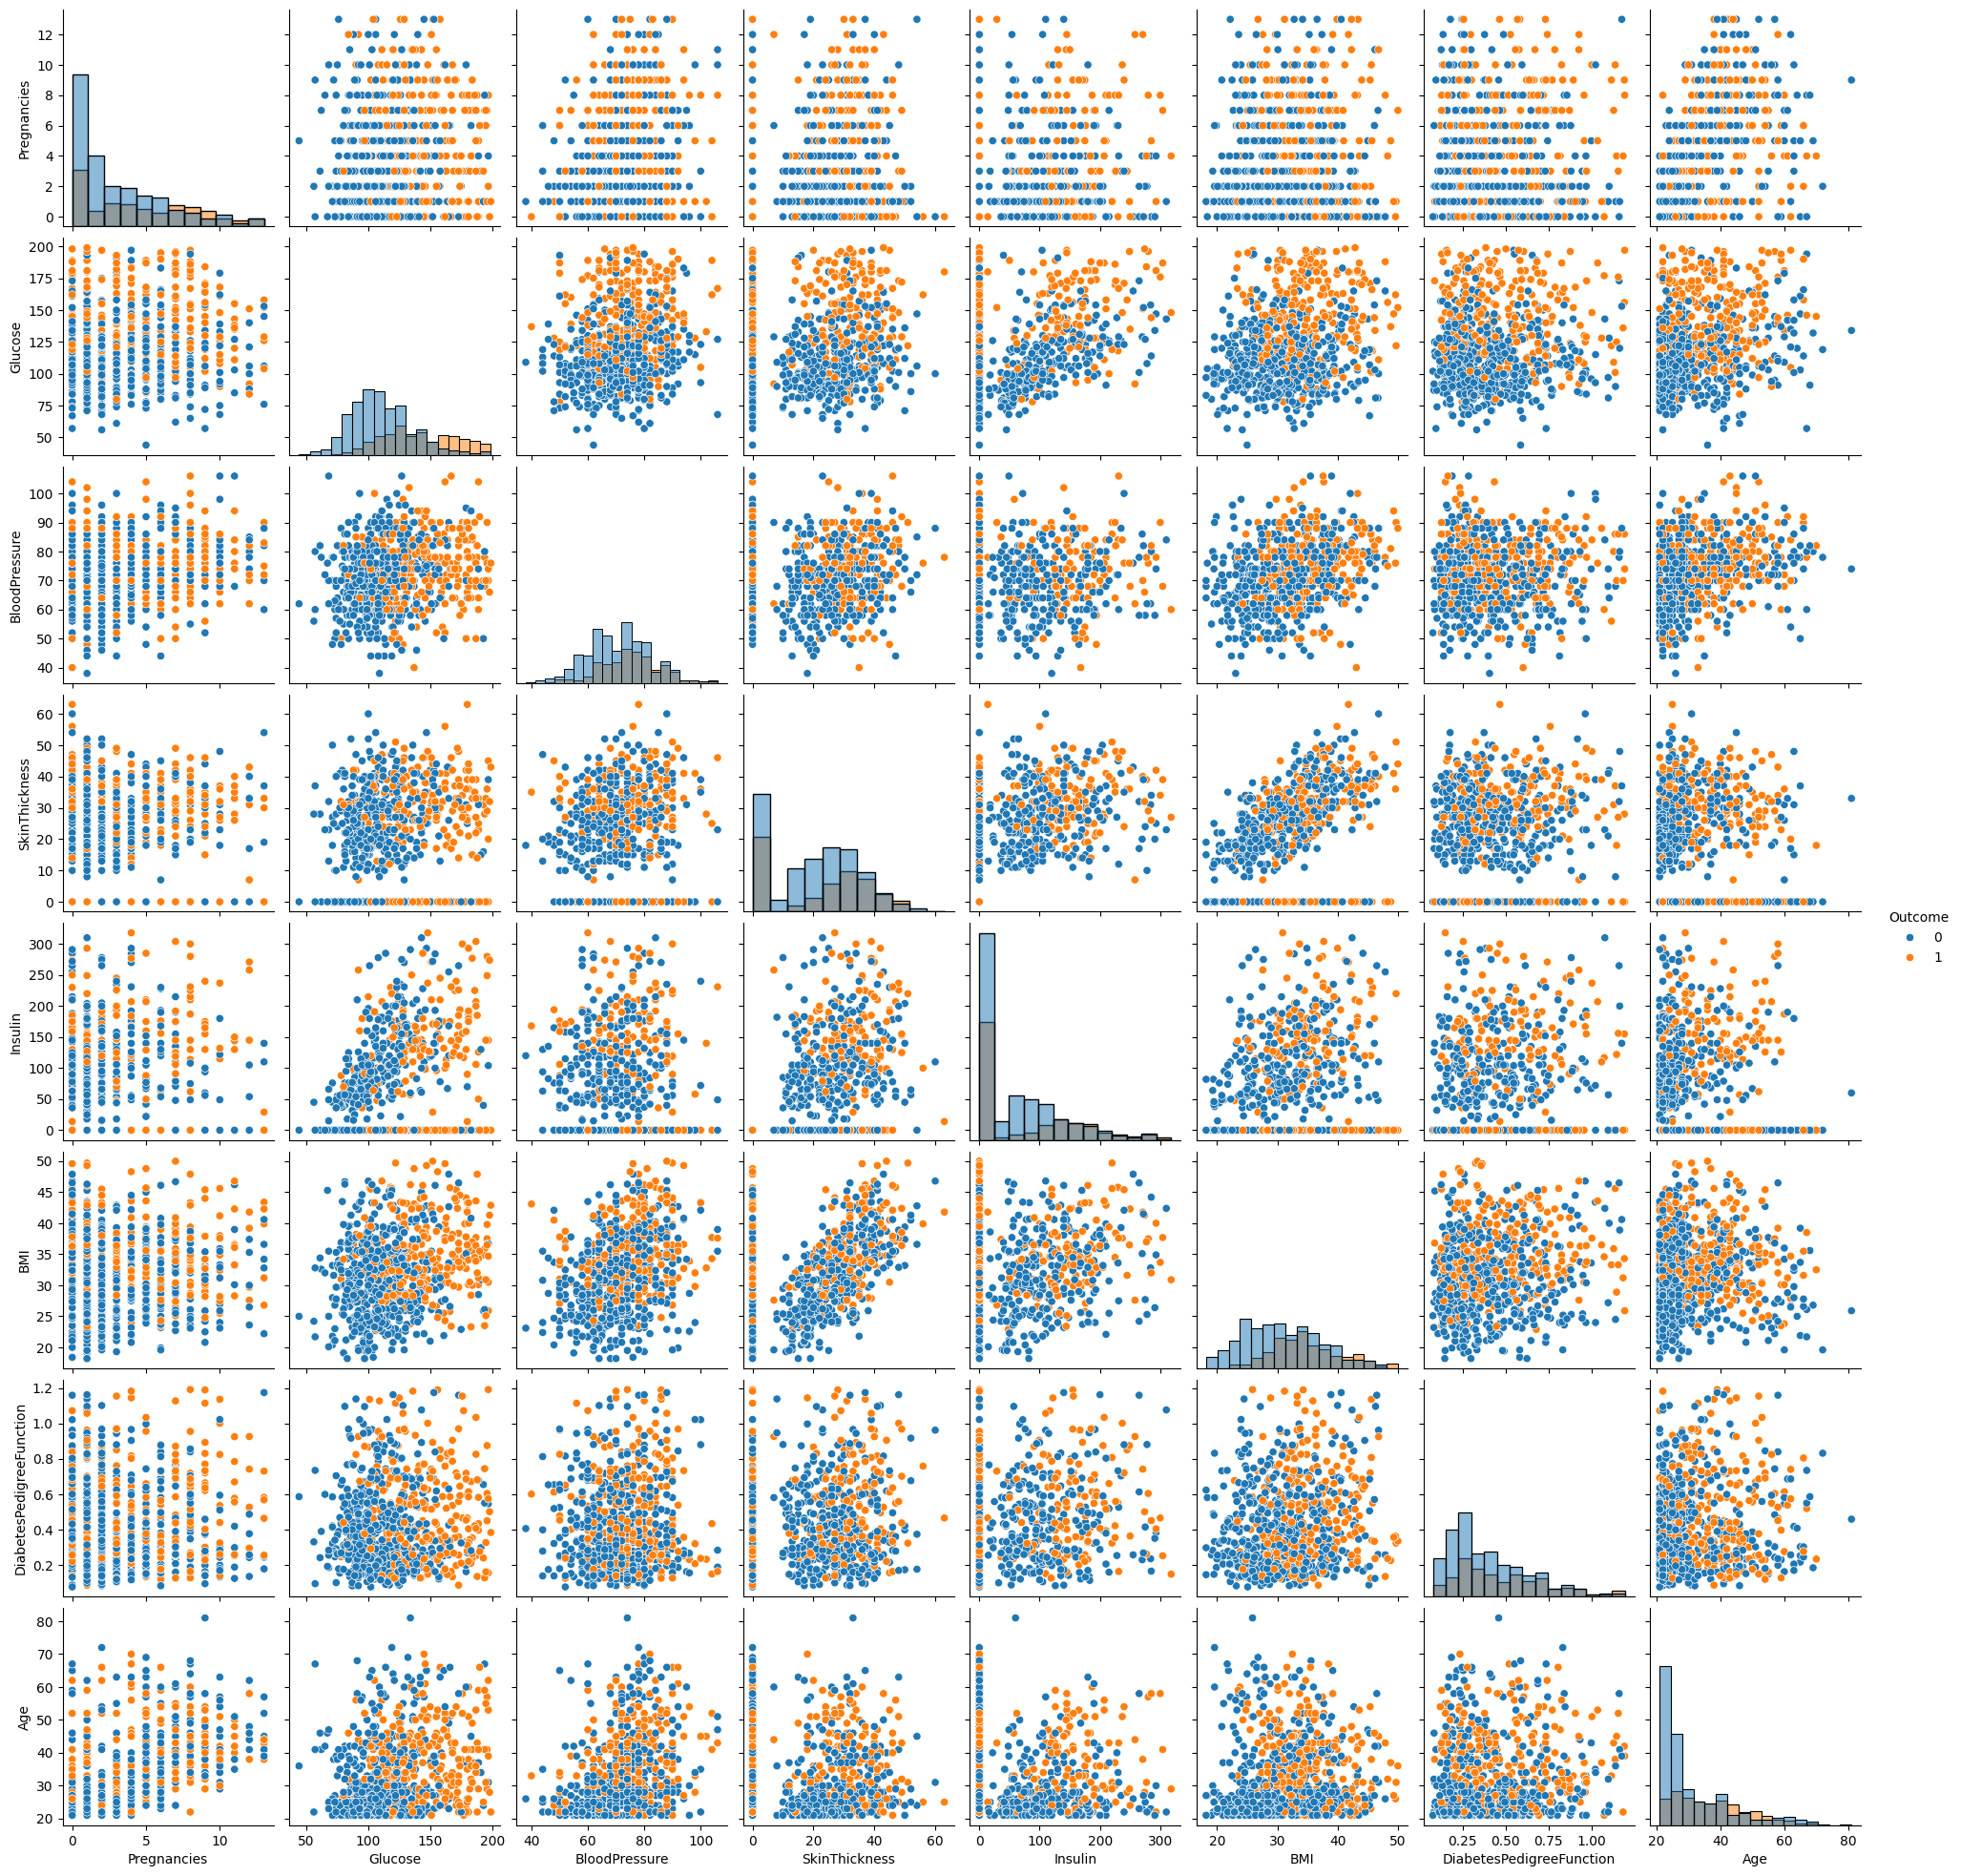

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, diag_kind = 'hist', hue = 'Outcome')
plt.show()

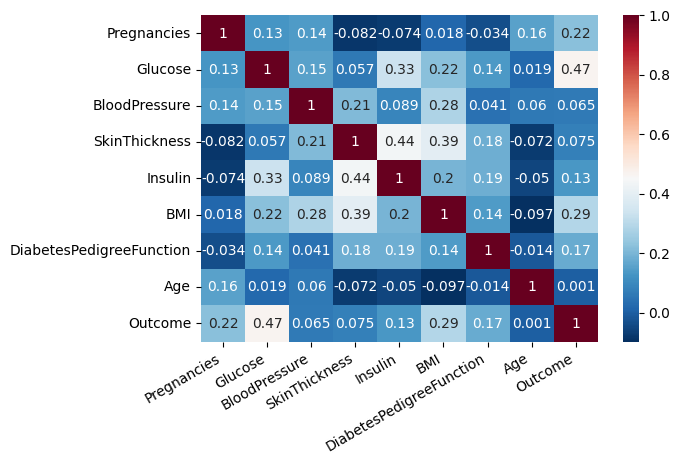

In [11]:
df_corr = df.corr(method = 'pearson')
fig,ax = plt.subplots()
sns.heatmap(df_corr, xticklabels = df.columns, yticklabels = df.columns, cmap = 'RdBu_r', annot = True)
fig.autofmt_xdate()

독립변수안에서 다중공선성을 걱정할 만큼 강한 상관관계를 가지는 변수쌍은 없어 보이며, glucose, bmi, pregnancies 순으로 당뇨병의 유무와 가장 관련이 있어 보인다.


당뇨병유무는 수치형 데이터이지만, 실질적으로는 범주형 데이터이므로, 시각화해보겠다.

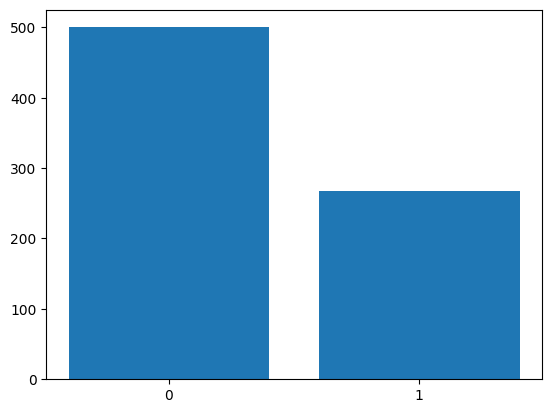

In [21]:
plt.bar(df['Outcome'].value_counts().index, df['Outcome'].value_counts().values)
plt.xticks([0,1])
plt.show()

당뇨병에 걸린환자가 당뇨병에 걸리지 않은 환자의 약 50%라는 것을 알 수 있다.  
따라서 클래스 불균형 처리를 해야 함을 미리 인지할 수 있다.  

## (2) 이상치를 식별하고 처리하시오.

이상치를 처리하는 대표적인 방식인 IQR방법을 사용하여 이상치를 식별해보겠다.  


우선 이상치가 단 하나의 컬럼에서라도 존재하는 행은 다음과 같다.  


In [180]:
import numpy as np

# 이상치를 식별할 함수
def outliers_iqr(dt, col):
  q1, q3 = np.percentile(dt[col], [25,75])
  iqr = q3 - q1
  l = q1 - (iqr*1.5)
  u = q3 + (iqr*1.5)
  outliers = dt[(dt[col] > u) |
                (dt[col] < l)
  ]
  return outliers[[col]]

outliers_dict = dict()
outliers =  pd.DataFrame()
for c in df.columns:
  outlier_c = outliers_iqr(df, c)
  outliers_dict[c] = outlier_c
  if len(outlier_c) :
    outliers = pd.concat([outliers, outlier_c], axis = 1)
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999.0
629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999.0
666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0


각 컬럼에 따른 이상치를 포함하고 있는 행의 index는 다음과 같다.

In [ ]:
for o in outliers_dict.values():
  print(o)

포도당,혈압, BMI 등이 0.0이라는 수치를 가질 수 없고,  
임신횟수가 14, 15,17회처럼 극단적일 수 없으며, age가 999일 수 없으므로, 대부분의 이상치들을 적절하게 식별해내고 있음을 알 수 있다.  
단, 임신의 횟수가 정말 14회 이상에 다다를 수 있지만, 모델 전체에 악영향을 줄 수 있으므로 정제해 줄 것이며, age의 경우에는 68~81사이의 값들도 이상치로 분류되었지만 현실적인 값들이기 때문에, 정제하지 않을 것이다.  


In [182]:
# age가 81보다 큰 레코드들만 이상치로 분류한다.
outliers_dict['Age'] = outliers_dict['Age'][(outliers_dict['Age'].values > 81)]
outliers_dict['Age']

,Age
559,999
629,999
684,999


이상치는 제거할 수도 있고, 다른 값으로 대체할 수도 있다.  
이상치를 포함한 행의 비율이 상당히 크므로, 대체해보자.  
이상치 대체는 단순 대치법과 KNN을 이용한 대체법이 있다.  
KNN을 이용할 때에는 거리 계산이 가능한 수치형 변수만 사용 가능한데, 수치형 변수만 결측치가 있으므로 KNN기법을 사용하여 대체해 보겠다.  

In [189]:
# 편의를 위해 이상치를 모두 Null로 대체한다.
df_null = df.copy()

for o in outliers_dict.values():
  df_null.loc[o.index,o.columns] = np.nan
df_null.isna().sum()

,0
Pregnancies,4
Glucose,5
BloodPressure,45
SkinThickness,1
Insulin,34
BMI,19
DiabetesPedigreeFunction,29
Age,3
Outcome,0


In [190]:
df_null[df_null.isna().any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0,1
7,10.0,115.0,NaN,0.0,0.0,35.3,0.134,29.0,0
8,2.0,197.0,70.0,45.0,NaN,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,NaN,0.232,54.0,1
12,10.0,139.0,80.0,0.0,0.0,27.1,NaN,57.0,0
...,...,...,...,...,...,...,...,...,...
706,10.0,115.0,NaN,0.0,0.0,NaN,0.261,30.0,1
707,2.0,127.0,46.0,21.0,NaN,34.4,0.176,22.0,0
710,3.0,158.0,64.0,13.0,NaN,31.2,0.295,24.0,0
715,7.0,187.0,50.0,33.0,NaN,33.9,0.826,34.0,1


In [191]:
from sklearn.impute import KNNImputer

# 결측치가 있는 수치형 데이터만을 추출
complete_c = df_null.isna().sum().index[df_null.isna().sum().values == 0]
KNN_data = df_null.drop(columns = complete_c)
KNN_data
imputer = KNNImputer()
df_filled = imputer.fit_transform(KNN_data)
df_filled = pd.DataFrame(df_filled, columns = KNN_data.columns)
df_null[KNN_data.columns] = df_filled

df_null.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [192]:
df = df_null.copy()

In [ ]:
for o in outliers_dict.values():
  print(df.loc[o.index, o.columns])

In [203]:
# 원래int형이였던 데이터들을 다시 int형으로 바꿔주자
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age']] = \
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## (3) 앞선 두 단계에서 발견한 향후 분석 시에 고려해야 할 사항을 작성하시오.

위에 언급했듯이, 클래스 불균형이 있으므로, 업 샘플링 혹은 언더샘플링을 통해 해결해야 하며,  
상관관계가 강한 변수쌍은 없으므로, 모든 변수들을 사용하여 모델링해도 될 것으로 판단된다.  
또한 desscribe()함수의 결과를 보게 되면, 최솟값과 최댓값의 차이가 많이 나는 컬럼이 존재하므로, 선형 모델 사용시 scale을 적용할 필요가 있어 보인다.  

# 2. 클래스 불균형 처리

## (1) 업 샘플링 과정을 설명하고 결과를 작성하시오

업 샘플링은 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만큼 증식시켜 학습에 사용하기 위한 충분하 양의 비율의 데이터를 확보하는 기법이다.  
업 샘플링은 Random Over Sampling과 SMOTE(Synthetic Minority Over-sampling Technique)가 있다.

### Random Over Sampling
소수의 레이블을 지닌 데이터세트를 단순 복제하여 다수의 레이블과 비율을 맞추는 방법이다.  

### SMOTE

소수 레이블을 지닌 데이터세트의 관측 값에 대해 K개의 최근접 이웃을 찾고, 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법으로 샘플의 수를 늘리는 방법이다.

In [220]:
# 데이터 불균형 확인
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


EDA에서 살펴보았듯, 양성클래스가 약 50%적다.

In [221]:
# 먼저 데이터를 종속변수와 독립변수로 나눈다.
features = df.columns.difference(['Outcome'])
X = df[features]
y = df['Outcome']

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [231]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE

#RandomOverSampling

over_sample = RandomOverSampler(sampling_strategy = 1)
x_over, y_over = over_sample.fit_resample(X,y)
print("RandomOversampling 결과 : ",Counter(y_over))
print('RandomOverSampling의 타깃 분포')
print(y_over.value_counts()/len(y_over))

print('---'*10)
# SMOTE
smote_sample = SMOTE(sampling_strategy= 'minority')
x_sm, y_sm = smote_sample.fit_resample(X,y)
print("SMOTE 결과 : ",Counter(y_sm))

print('SMOTE의 타깃 분포')
print(y_sm.value_counts()/len(y_sm))

RandomOversampling 결과 :  Counter({1: 500, 0: 500})
RandomOverSampling의 타깃 분포
Outcome
1    0.5
0    0.5
Name: count, dtype: float64
------------------------------
SMOTE 결과 :  Counter({1: 500, 0: 500})
SMOTE의 타깃 분포
Outcome
1    0.5
0    0.5
Name: count, dtype: float64


## (2) 언더 샘플링 과정을 설명하고 결과를 작성하시오

언더 샘플링은 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트가 가진 레이블의 수 수준으로 감소시키는 기법이다.  
이 기법을 사용하면 데이터 불균형으로 인한 문제는 피할 수 있지만 전체 데이터의 수가 급격하게 줄어들어 오히려 학습 성능을 떨어뜨리는 결과를 초래할 수 있다.  



In [247]:
from imblearn.under_sampling import RandomUnderSampler

under_sample = RandomUnderSampler(sampling_strategy = 'majority')
x_under, y_under = under_sample.fit_resample(X,y)

print("RandomUnderSampling 결과 : ",Counter(y_under))

print('RandomUnderSampling 타깃 분포')
print(y_under.value_counts()/len(y_under))

RandomUnderSampling 결과 :  Counter({0: 268, 1: 268})
RandomUnderSampling 타깃 분포
Outcome
0    0.5
1    0.5
Name: count, dtype: float64


## (3) 둘 중 하나를 선택하고 선택한 이유를 서술하시오.

상술했듯이 언더 샘플링은 학습 성능을 떨어뜨리는 결과를 초래할 수 있기 때문에, 오버 샘플링을 선택한다.

# 3. 모델링


## (1) 최소 3개 이상의 알고리즘을 제시하고 정확도 측면의 모델 1개와 속도 측면의 모델 1개를 선정하시오.

logistic regression, svm, Histogram Gradient Boosting Tree, randomforest 4개의 모델을 제시한다.

In [359]:
# 먼저 데이터를 훈련데이터와 학습데이터로 분류한다
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, stratify = y_sm, random_state = 1)
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)
print(X_train.shape)
print(X_test.shape)

(800, 8)
(200, 8)


In [389]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
import time

### Logistic regression

In [390]:
# 파이프라인 생성
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state = 1))

k-겹 교차 검증을 적용하여 오버피팅을 줄여보자.

In [370]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits = 5).split(X_train, y_train)
scores_lr = []

for k , (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train.iloc[train], y_train.iloc[train])
  score = pipe_lr.score(X_train.iloc[test], y_train.iloc[test])
  scores_lr.append(score)
  print(f'폴드 : {k+1:02d},'
        f'클래스 분포 : {np.bincount(y_train[test])},'
        f'정확도 : {score:.3f}') # Changed 3.f to .3f to specify precision
mean_lr = np.mean(scores_lr)
std_lr = np.std(scores_lr)
print(f'평균 검증 정확도 : {mean_lr:.3f}')
print(f'검증 정확도 표준편차 : {std_lr:.3f}')

폴드 : 01,클래스 분포 : [80 80],정확도 : 0.769
폴드 : 02,클래스 분포 : [80 80],정확도 : 0.744
폴드 : 03,클래스 분포 : [80 80],정확도 : 0.750
폴드 : 04,클래스 분포 : [80 80],정확도 : 0.706
폴드 : 05,클래스 분포 : [80 80],정확도 : 0.700
평균 검증 정확도 : 0.734
검증 정확도 표준편차 : 0.026


### svm

In [371]:
# 파이프라인 생성
pipe_svm = make_pipeline(StandardScaler(),
                        SVC(kernel = 'linear', random_state = 1))

In [373]:
kfold = StratifiedKFold(n_splits = 5).split(X_train, y_train)
scores_svm = []

for k , (train, test) in enumerate(kfold):
  pipe_svm.fit(X_train.iloc[train], y_train.iloc[train])
  score = pipe_svm.score(X_train.iloc[test], y_train.iloc[test])
  scores_svm.append(score)
  print(f'폴드 : {k+1:02d},'
        f'클래스 분포 : {np.bincount(y_train[test])},'
        f'정확도 : {score:.3f}') # Changed 3.f to .3f to specify precision
mean_svm = np.mean(scores_svm)
std_svm = np.std(scores_svm)
print(f'평균 검증 정확도 : {mean_svm:.3f}')
print(f'검증 정확도 표준편차 : {std_svm:.3f}')

폴드 : 01,클래스 분포 : [80 80],정확도 : 0.762
폴드 : 02,클래스 분포 : [80 80],정확도 : 0.750
폴드 : 03,클래스 분포 : [80 80],정확도 : 0.744
폴드 : 04,클래스 분포 : [80 80],정확도 : 0.694
폴드 : 05,클래스 분포 : [80 80],정확도 : 0.706
평균 검증 정확도 : 0.731
검증 정확도 표준편차 : 0.027


###  Histogram Gradient Boosting Tree

In [379]:
# hgbt는 굳이 feature scaling이 필요하지 않다.
pipe_hgbt = make_pipeline(HistGradientBoostingClassifier(random_state = 1)
                          )

In [380]:
kfold = StratifiedKFold(n_splits = 5).split(X_train, y_train)
scores_hgbt = []

for k , (train, test) in enumerate(kfold):
  pipe_hgbt.fit(X_train.iloc[train], y_train.iloc[train])
  score = pipe_hgbt.score(X_train.iloc[test], y_train.iloc[test])
  scores_hgbt.append(score)
  print(f'폴드 : {k+1:02d},'
        f'클래스 분포 : {np.bincount(y_train[test])},'
        f'정확도 : {score:.3f}') # Changed 3.f to .3f to specify precision
mean_hgbt = np.mean(scores_hgbt)
std_hgbt = np.std(scores_hgbt)
print(f'평균 검증 정확도 : {mean_hgbt:.3f}')
print(f'검증 정확도 표준편차 : {std_hgbt:.3f}')

폴드 : 01,클래스 분포 : [80 80],정확도 : 0.819
폴드 : 02,클래스 분포 : [80 80],정확도 : 0.825
폴드 : 03,클래스 분포 : [80 80],정확도 : 0.787
폴드 : 04,클래스 분포 : [80 80],정확도 : 0.731
폴드 : 05,클래스 분포 : [80 80],정확도 : 0.800
평균 검증 정확도 : 0.792
검증 정확도 표준편차 : 0.033


### RandomForest

In [381]:
# random forest는 굳이 feature scaling이 필요하지 않다.
pipe_rfc = make_pipeline(RandomForestClassifier(n_estimators=25,
                                                random_state = 1,
                                                n_jobs = -1)
                          )

In [382]:
kfold = StratifiedKFold(n_splits = 5).split(X_train, y_train)
scores_rfc = []

for k , (train, test) in enumerate(kfold):
  pipe_rfc.fit(X_train.iloc[train], y_train.iloc[train])
  score = pipe_rfc.score(X_train.iloc[test], y_train.iloc[test])
  scores_rfc.append(score)
  print(f'폴드 : {k+1:02d},'
        f'클래스 분포 : {np.bincount(y_train[test])},'
        f'정확도 : {score:.3f}') # Changed 3.f to .3f to specify precision
mean_rfc = np.mean(scores_rfc)
std_rfc = np.std(scores_rfc)
print(f'평균 검증 정확도 : {mean_rfc:.3f}')
print(f'검증 정확도 표준편차 : {std_rfc:.3f}')

폴드 : 01,클래스 분포 : [80 80],정확도 : 0.806
폴드 : 02,클래스 분포 : [80 80],정확도 : 0.794
폴드 : 03,클래스 분포 : [80 80],정확도 : 0.819
폴드 : 04,클래스 분포 : [80 80],정확도 : 0.762
폴드 : 05,클래스 분포 : [80 80],정확도 : 0.787
평균 검증 정확도 : 0.794
검증 정확도 표준편차 : 0.019


## (2) 모델을 비교하고 결과를 설명하시오

In [401]:
model_nm =['Logistic Regression', 'SVM', 'Histogram Gradient Boosting Tree', 'Random Forest']
scores = pd.DataFrame([mean_lr, mean_svm, mean_hgbt, mean_rfc])
std = pd.DataFrame([std_lr, std_svm, std_hgbt, std_rfc])

results = pd.concat([ pd.DataFrame(model_nm),scores,std],axis = 1)
results.columns = ['model_nm','scores','std']
results.sort_values(by = ['scores'], ascending = False, inplace = True)
results

,model_nm,scores,std
3,Random Forest,0.79375,0.018957
2,Histogram Gradient Boosting Tree,0.79250,0.033401
0,Logistic Regression,0.73375,0.026398
1,SVM,0.73125,0.026517


Random Forest가 train set에서 가장 좋은 점수를 기록했으며, 점수의 분산 또한 제일 낮아 정확도 측면에서 제일 좋은 모델임을 미리 예측할 수 있다.  
실제 test set에서 그러한지 확인해보자.



In [407]:
from sklearn.metrics import accuracy_score

models = [pipe_lr, pipe_svm, pipe_hgbt, pipe_rfc]
for m,nm in zip(models,model_nm):
  print(nm)
  start = time.time()
  m.fit(X_train, y_train)
  pred = m.predict(X_test)
  end = time.time()
  score = accuracy_score(y_test, pred)
  print(f"predicted with accuracy of {score:.3f}, with {end - start:.5f} sec")
  print("-----"*10)

Logistic Regression
predicted with accuracy of 0.770, with 0.02212 sec
--------------------------------------------------
SVM
predicted with accuracy of 0.765, with 0.04627 sec
--------------------------------------------------
Histogram Gradient Boosting Tree
predicted with accuracy of 0.785, with 0.60343 sec
--------------------------------------------------
Random Forest
predicted with accuracy of 0.775, with 0.18094 sec
--------------------------------------------------


실제로는 HGBT가 가장 높은 점수를 얻었으나, 속도 측면에서는 제일 느렸다.  
반면 속도 측면에서 제일 빠른 모델은 Logistic Regression 이였다.  

## (3) 속도 개선을 위한 차원 축소 방법을 설명하고 수행하시오. 그리고 예측 성능과 속도를 비교하고 결과를 작성하시오

가장 좋은 결과를 얻었던 hgbt는 수많은 의사결정나무를 만들어야하기 때문에 학습 시간과 연산이 많이 든다는 것이 단점이다.
이때 PCA를 활용하여 차원 축소를 진행한다면 학습 시간을 줄일 수 있다.  


먼저 총 분산과 설명된 분산을 그려 몇개의 변수를 선택하면 좋을지 판단해보자.

고윳값 : 
 [2.00760036 1.86732853 0.41098977 0.36754897 0.59094172 1.00924017
 0.92311874 0.83324426]


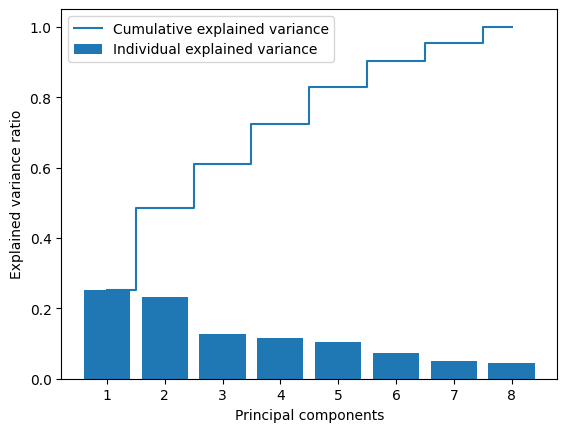

설명된 분산 :  [0.25063636 0.48376065 0.60975798 0.72500359 0.82902892 0.9028043
 0.95411381 1.        ]


In [415]:
from sklearn.decomposition import PCA
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

cov_mat = np.cov(X_train_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('고윳값 : \n', eigen_vals)

tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,len(X.columns)+1), var_exp, align = 'center', label = 'Individual explained variance')
plt.step(range(1, len(X.columns)+1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()
print('설명된 분산 : ',cum_var_exp)

5주성분까지 사용하면, 전체 데이터에 83%정도를 설명할 수 있음을 확인하였다.  
이제 이 5개의 주성분만 가지고 모델링해보자

In [434]:
pipe_hgbt = make_pipeline(StandardScaler(),
                          PCA(n_components = 5),
                          HistGradientBoostingClassifier(random_state = 1)
                          )

pipe_hgbt.fit(X_train,y_train)
start = time.time()
pred = pipe_hgbt.predict(X_test)
end = time.time()
print(f'predicted with accuracy of {accuracy_score(y_test, pred):.3f} with {end - start :.5f} sec')

predicted with accuracy of 0.745 with 0.00793 sec


In [435]:
pipe_rfc = make_pipeline(StandardScaler(),
                          PCA(n_components = 5),
                          RandomForestClassifier(n_estimators=25,
                                                random_state = 1,
                                                n_jobs = -1)
                          )

pipe_rfc.fit(X_train,y_train)
start = time.time()
pred = pipe_rfc.predict(X_test)
end = time.time()
print(f'predicted with accuracy of {accuracy_score(y_test, pred):.3f} with {end - start :.5f} sec')

predicted with accuracy of 0.745 with 0.04153 sec


In [436]:
pipe_lr = make_pipeline(StandardScaler(),
                          PCA(n_components = 5),
                          LogisticRegression(random_state = 1)
                          )

pipe_lr.fit(X_train,y_train)
start = time.time()
pred = pipe_lr.predict(X_test)
end = time.time()
print(f'predicted with accuracy of {accuracy_score(y_test, pred):.3f} with {end - start :.5f} sec')

predicted with accuracy of 0.750 with 0.00343 sec


In [437]:
pipe_svm = make_pipeline(StandardScaler(),
                          PCA(n_components = 5),
                          SVC(kernel = 'linear', random_state = 1)
                          )

pipe_svm.fit(X_train,y_train)
start = time.time()
pred = pipe_svm.predict(X_test)
end = time.time()
print(f'predicted with accuracy of {accuracy_score(y_test, pred):.3f} with {end - start :.5f} sec')

predicted with accuracy of 0.755 with 0.01422 sec


예측 성능은 다소 떨어졌지만, 속도 측면에서 차원 축소에 의해 매우 빨라졌다.  